# Investment Strategy: A low-volatility and momentum strategy with LSTM neural network 1-day

# Victor Bustos & Marcus Nunes

## Initial Exploratory Analysis

Based on LSTM stock prediction values, we calculate 1-day future returns, analysing SP&500 stocks and selecting the desired stocks to add to the portfolio through a 'low-volatility-momentum' strategy. First we analyze the data history to find a value to the maximum volatility accepted, then we analyze the momentum scores of the stocks using three different periods (21-days, 63-month and 126-month momentum scores), selecting a reasonable momentum threshold in accordance to the distributions of these scores, thereafter selecting some interesting stocks. The final momentum score is calculated by using a weighted momentum average of weigths 0.4 for 21-days momentum and 0.3 for 63-days and 126-days momentum and must be greater than the momentum threshold. We pre-select the stocks to be invested based upon these two criterias: they must pass the volatility and momentum tests and then we get the best 10 stocks momentum scores (this number of stocks can vary if more stocks are necessary).

In this test we chose volatility and momentum thresholds as 0.2 and log(1.1), respectively. The reason for the last choice is that it captures all stocks with an average appreciation of 10%.

  A momentum strategy is a strategy to buy past winners and to sell past losers. It's a bet on the ability of past returns to predict future returns - academic literature has documented evidence that momentum profits are significantly positive and pervasive across multiple time periods.

c:\Users\marcu\Documents\PO_245\template_projetos\example\lstm_strategy_new.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vol_df[f'{column}'] = np.nan_to_num(log_returns[column].rolling(volatility_window).std())
c:\Users\marcu\Documents\PO_245\template_projetos\example\lstm_strategy_new.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  momentum_scores_21[f'{column}'] = np.nan_to_num(momentum_scores)
c:\Users\marcu\Documents\PO_245\template_projetos\example\lstm_strategy_new.py:57: PerformanceWarning: DataFrame is highl

Maximum volatility:  0.04608641287225426
Selected stocks:


['DPZ', 'WST', 'ODFL', 'MKTX', 'TYL', 'AAPL', 'CPRT', 'MSCI', 'EXR', 'KR']

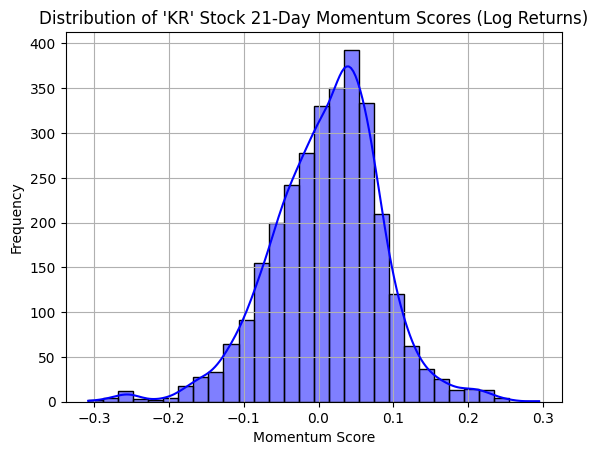

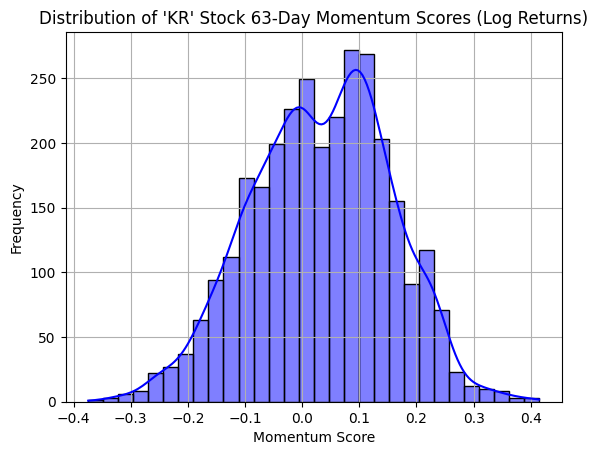

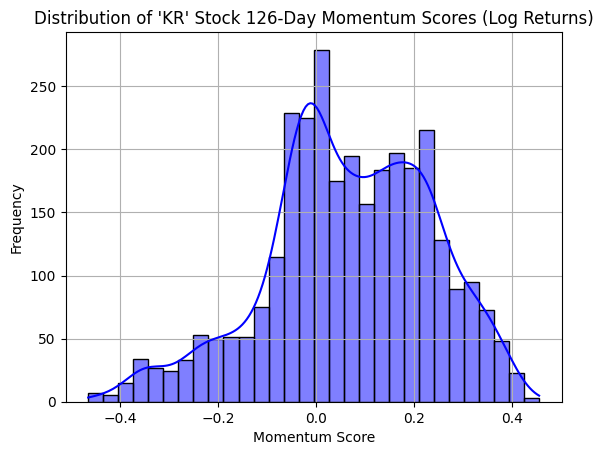

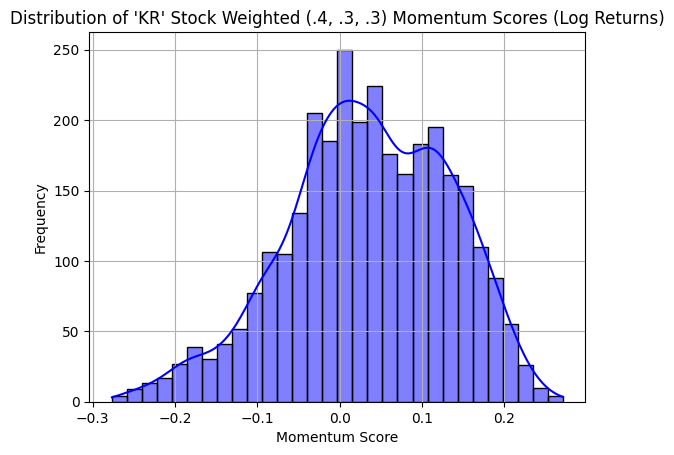

In [1]:
from example.lstm_strategy_new import *

sel_stocks = initial_analysis()
print('Selected stocks:')
display(sel_stocks)

## Preparing data for model prediction

An example of 60-day windowed Dataframe

First plot presents the returns and second the log-returns

Maximum scale:  0.11079525947570801


,Target Date,Target-60,Target-59,Target-58,Target-57,Target-56,Target-55,Target-54,Target-53,Target-52,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target of Stock
0,2017-12-29,-0.005762,0.021464,-0.003038,0.001958,0.017551,-0.000961,-0.040025,-0.04087,0.001097,...,0.013741,0.005126,0.005722,-0.018586,0.025677,0.023502,-0.013068,0.001054,-0.00311,-0.005353
1,2018-01-02,0.021464,-0.003038,0.001958,0.017551,-0.000961,-0.040025,-0.04087,0.001097,-0.004782,...,0.005126,0.005722,-0.018586,0.025677,0.023502,-0.013068,0.001054,-0.00311,-0.005353,-0.010794
2,2018-01-03,-0.003038,0.001958,0.017551,-0.000961,-0.040025,-0.04087,0.001097,-0.004782,-0.02358,...,0.005722,-0.018586,0.025677,0.023502,-0.013068,0.001054,-0.00311,-0.005353,-0.010794,0.024951
3,2018-01-04,0.001958,0.017551,-0.000961,-0.040025,-0.04087,0.001097,-0.004782,-0.02358,-0.008953,...,-0.018586,0.025677,0.023502,-0.013068,0.001054,-0.00311,-0.005353,-0.010794,0.024951,0.028961
4,2018-01-05,0.017551,-0.000961,-0.040025,-0.04087,0.001097,-0.004782,-0.02358,-0.008953,0.0,...,0.025677,0.023502,-0.013068,0.001054,-0.00311,-0.005353,-0.010794,0.024951,0.028961,0.015148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,2019-06-24,0.025294,0.016326,-0.034094,-0.01711,0.031664,-0.016609,0.02233,-0.028139,0.00135,...,-0.008912,0.006654,-0.000222,-0.002263,0.004817,0.001219,-0.005925,0.00404,-0.005304,-0.021462
372,2019-06-25,0.016326,-0.034094,-0.01711,0.031664,-0.016609,0.02233,-0.028139,0.00135,0.004459,...,0.006654,-0.000222,-0.002263,0.004817,0.001219,-0.005925,0.00404,-0.005304,-0.021462,0.010018
373,2019-06-26,-0.034094,-0.01711,0.031664,-0.016609,0.02233,-0.028139,0.00135,0.004459,0.026222,...,-0.000222,-0.002263,0.004817,0.001219,-0.005925,0.00404,-0.005304,-0.021462,0.010018,-0.004600
374,2019-06-27,-0.01711,0.031664,-0.016609,0.02233,-0.028139,0.00135,0.004459,0.026222,0.008022,...,-0.002263,0.004817,0.001219,-0.005925,0.00404,-0.005304,-0.021462,0.010018,-0.0046,0.007492


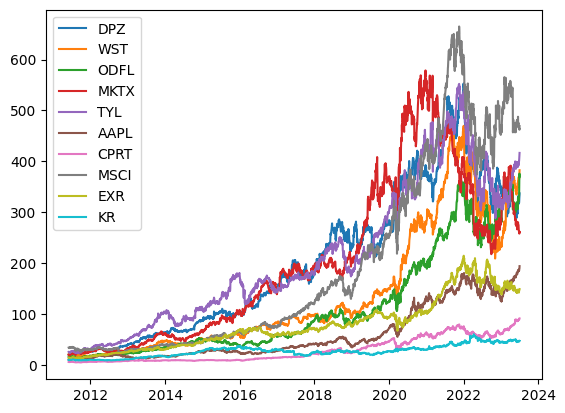

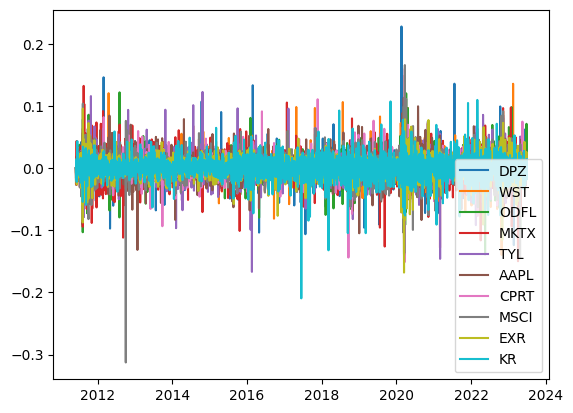

In [2]:
dfs_dict = prepare_model_data(sel_stocks)
dfs_dict['windowed_dfs']['DPZ']

## Stocks Wallet

Returns the wallet and the predicted returns. Shows the real returns just for comparison purpose.

The plots shows the returns predictions for the selected stocks.

MSE: 0.0003482976
MSE: 0.0002491938
MSE: 0.0003515482
MSE: 0.00019568684
MSE: 0.00027034432
MSE: 0.0006716509
MSE: 0.00028963998
MSE: 0.00032600635
MSE: 0.000114736125
MSE: 0.00056698144


,Stock,Weights,Predicted Returns,Real Returns
0,DPZ,0.0000,-0.000837,0.001238
1,WST,0.3407,0.007590,0.012684
2,ODFL,0.1412,0.003145,0.013652
3,MKTX,0.2606,0.005804,0.016032
4,TYL,0.2575,0.005736,0.013417
5,AAPL,0.0000,-0.004277,-0.009082
6,CPRT,0.0000,-0.000197,0.018811
7,MSCI,0.0000,-0.000217,0.020016
8,EXR,0.0000,-0.002808,0.004654
9,KR,0.0000,-0.000515,0.015275


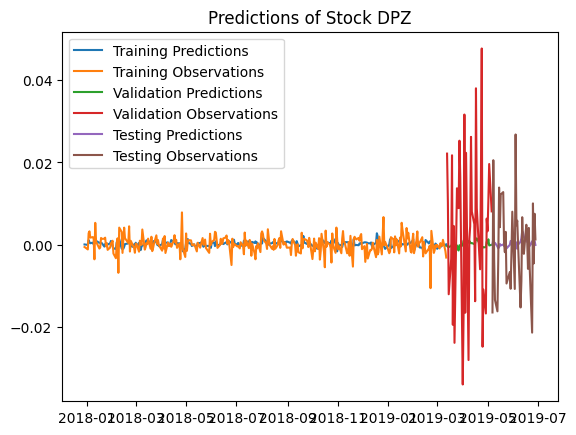

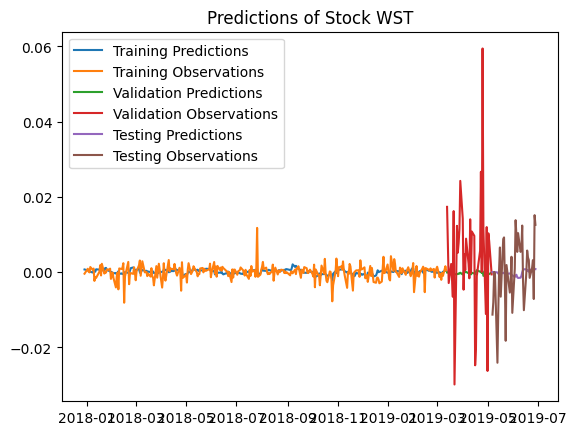

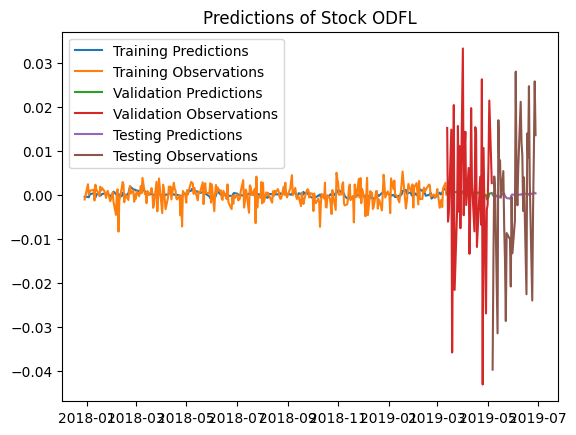

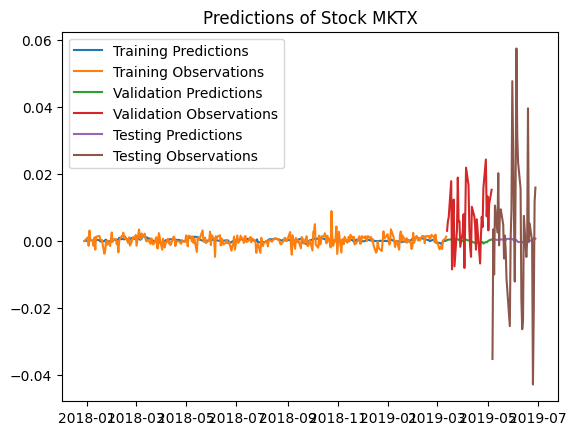

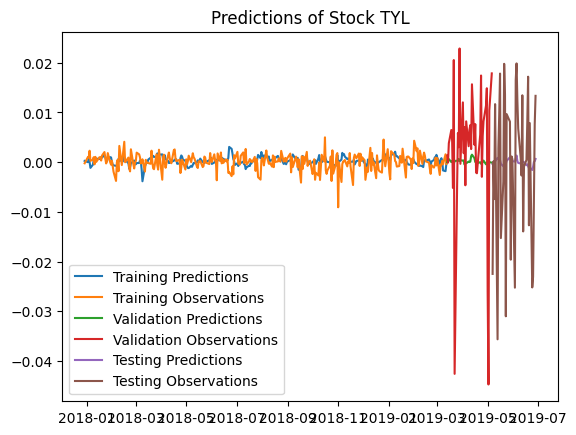

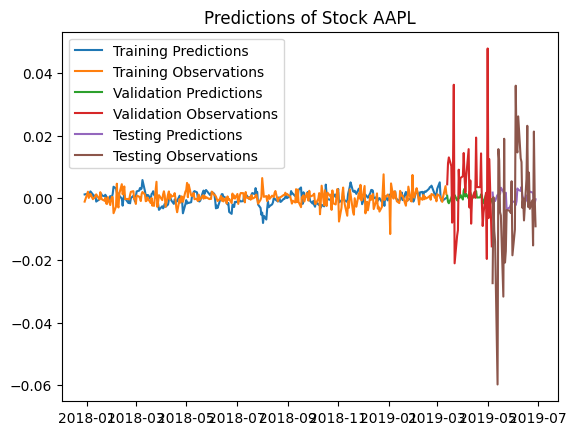

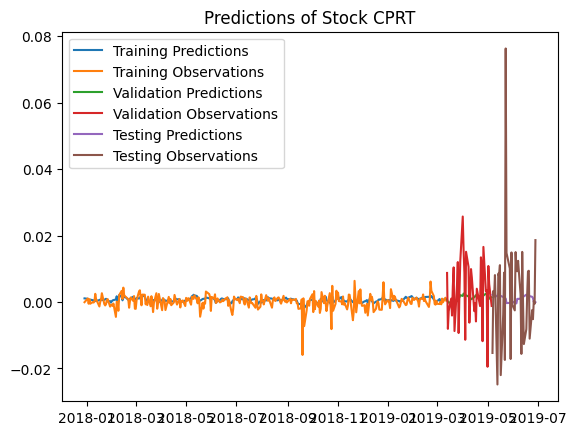

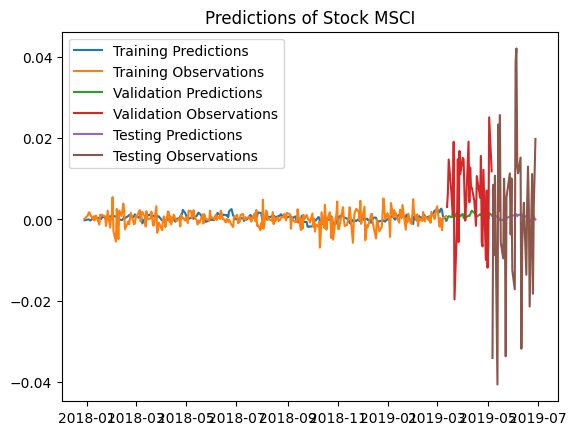

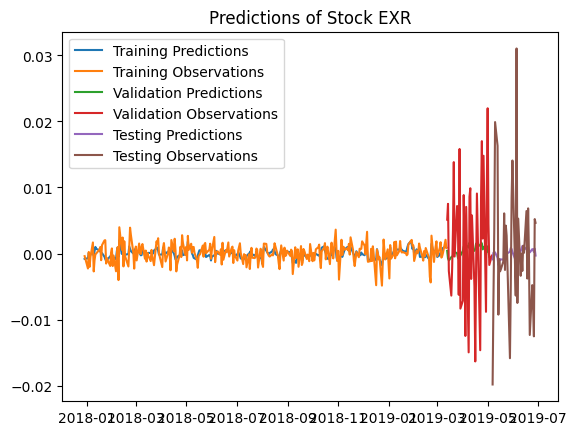

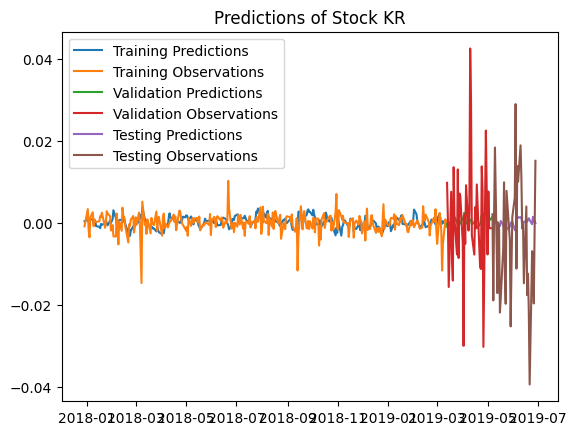

In [3]:
mount_wallet(sel_stocks, dfs_dict)